### Анализ файла книги Маленькие Женщины ###
Выполнила Набиуллина Розалия

Импорт библиотек

In [81]:
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
from nltk import FreqDist

Очистка библиотек

In [82]:
f = open('f.txt')
file = f.read() # открываем файл
sentences = sent_tokenize(file) # делим текст на предложения
sentences

['\n\nTitle: Little Women\n       or Meg, Jo, Beth, and Amy\n\nAuthor: Louisa M. Alcott\n\nIllustrator: Frank T. Merrill\n\nRelease Date: August 16, 2011 [EBook #37106]\nLast Update:  August 8, 2017\n\nLanguage: English\n\n\n\n\n                      [Illustration: LITTLE WOMEN\n                         MEG, JO, BETH, AND AMY\n                           LOUISA M. ALCOTT]\n\n\n\n\n                              LITTLE WOMEN.',
 '[Illustration: "They all drew to the fire, mother in the big chair, with\nBeth at her feet"\n                                              (See page 9) FRONTISPIECE]\n\n\n\n\n                              LITTLE WOMEN\n                                   OR\n                         Meg, Jo, Beth, and Amy\n\n\n                                   BY\n                            LOUISA M. ALCOTT\n\n            AUTHOR OF "LITTLE MEN," "AN OLD-FASHIONED GIRL"\n                     "SPINNING-WHEEL STORIES," ETC.',
 "_With more than 200 illustrations by Frank T. Merrill\

In [83]:
words = nltk.word_tokenize(file.lower()) # одновременно токенизируем и делаем все слова с маленькой буквы

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words
    
new_words = remove_punctuation(words) # убираем пунктуацию. Получаем текст без токенизированных запятых
unique_words = set(new_words)
unique_words

{'majesty',
 'cruel',
 'retiring',
 'wonderful',
 'looking',
 'borne',
 'crossbeam',
 'lectures',
 'stars',
 'sighed',
 'chocolatedrops',
 'plaguing',
 'cotton',
 'preached',
 'suffer',
 'wo',
 'bhaers',
 'coil',
 'hobby',
 'attacked',
 'laundry',
 'feeble',
 'portion',
 'goodbyes',
 'scrollwork',
 'heaps',
 'modest',
 'nation',
 'monsieur',
 'substitutes',
 'magazines',
 'request',
 'reminder',
 'aisles',
 'refreshed',
 'biddies',
 'casting',
 'lifelesslooking',
 'yelped',
 'estimation',
 'clasping',
 'edition',
 'rapped',
 'when',
 'neighbors',
 'flourished',
 'bouquet',
 'colds',
 'cooking',
 'labored',
 'columns',
 'exclusion',
 'outside',
 'p',
 'messroom',
 'consoler',
 'determined',
 'assumed',
 'rowed',
 '_dear_',
 'storybook',
 'sol',
 'stage',
 'actions',
 'hath',
 'drawingteacher',
 'airs',
 'freezing',
 'pickled',
 'ferdinando',
 'xv',
 'quoting',
 'accident',
 'woodpeople',
 'spots',
 'applause',
 'alteration',
 'single',
 'flirting',
 'step',
 'playfellows',
 'frolics',
 

In [84]:
mytext = nltk.Text(new_words) # делаем текст из токенизированных слов

Статистика по тексту

In [104]:
num_char = len(mytext) # ищем количество всех символов
num_words = len(set(unique_words)) # количество слов 
num_unique_w = len(set(unique_words))/len(new_words) # процент уникальных слов


print('количество символов в исходном тексте', num_char)
print('количество уникальных слов', num_words)
print('лексическое разнообразие', round(num_unique_w * 100, 2), '%')

количество символов в исходном тексте 197234
количество уникальных слов 11848
лексическое разнообразие 6.01 %
В среднем одно слово встречается 0 раз


Самое частое, самое редкое и медианное по частоте использования слово

In [86]:
c = Counter(new_words)
frequent = c.most_common()
print ("Три распространенных слова:",frequent[0][0],",",frequent[1][0],"и",frequent[2][0])
rare = c.most_common()[:-3-1:-1]
print ("Три наиболее редких слова:",rare[0][0],",",rare[1][0],"и",rare[2][0])
median = int(num_words/2) # середина нашего токенизированного текста
res = c.most_common() [6000:6005]
print ("Медианное по частоте использования слово:", res)

Три распространенных слова: and , the и to
Три наиболее редких слова: outline , structured и barnard
Медианное по частоте использования слово: [('level', 2), ('piety', 2), ('attributes', 2), ('integrity', 2), ('admirable', 2)]


Самое часто используемое существительное, прилагательное и глагол


In [87]:
NAV = dict(nltk.pos_tag(unique_words))
set_of_nav = [(w, NAV[w]) for w in unique_words]

In [88]:
nouns = [(w) for w,n in set_of_nav if n == 'NN' or n == 'NNS' or n == 'NNP']
print('Самые частые существительные', nouns[:5])
adjectives = [(w) for w,a in set_of_nav if a == 'JJ' or a == 'JJR' or a == 'JJS']
print('Самые частые прилагательные', adjectives[:5])
verbs = [(w) for w,v in set_of_nav if v == 'VBD' or v == 'VBG' or v == 'VBN' or v == 'VBP' or v == 'VBP']
print('Самые частые глаголы', verbs[:5])

Самые частые существительные ['cruel', 'crossbeam', 'stars', 'chocolatedrops', 'cotton']
Самые частые прилагательные ['majesty', 'wonderful', 'borne', 'feeble', 'heaps']
Самые частые глаголы ['retiring', 'looking', 'sighed', 'plaguing', 'preached']


In [89]:
frequency_distribution = FreqDist(new_words)
print(frequency_distribution)

<FreqDist with 11848 samples and 197234 outcomes>


In [90]:
frequency_distribution.most_common(20)

[('and', 8227),
 ('the', 7955),
 ('to', 5191),
 ('a', 4610),
 ('i', 3977),
 ('of', 3575),
 ('her', 3333),
 ('it', 2797),
 ('in', 2557),
 ('you', 2396),
 ('she', 2367),
 ('for', 2234),
 ('was', 2113),
 ('as', 1997),
 ('that', 1942),
 ('with', 1876),
 ('he', 1614),
 ('nt', 1587),
 ('but', 1478),
 ('s', 1452)]

График дисперсии частых слов 

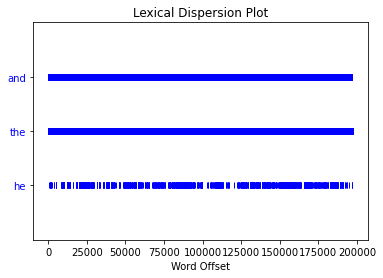

In [101]:
mytext.dispersion_plot(['and','the','he']) 
# если вам кажется что это белиберда, то нет, оно так и работает
# вот для менее распространенного 'he' выглядит более адекватно

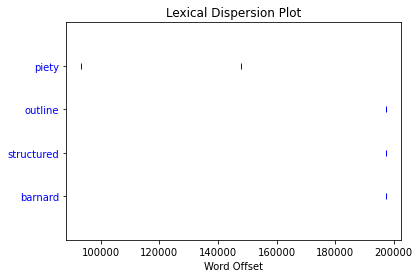

In [102]:
mytext.dispersion_plot(['outline', 'structured', 'barnard']) 

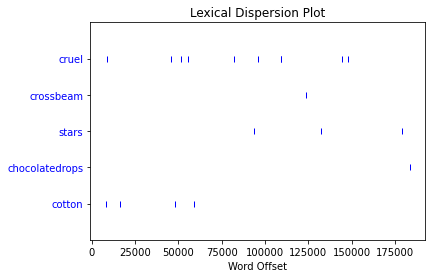

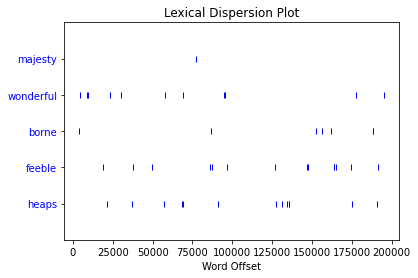

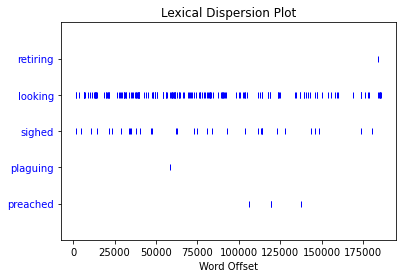

In [105]:
mytext.dispersion_plot(['cruel', 'crossbeam', 'stars', 'chocolatedrops', 'cotton'])
mytext.dispersion_plot(['majesty', 'wonderful', 'borne', 'feeble', 'heaps'])
mytext.dispersion_plot(['retiring', 'looking', 'sighed', 'plaguing', 'preached'])

Стопслова

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rosalie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
filtered_list = []
for word in new_words:
    if word.casefold() not in stop_words:
        filtered_list.append(word)

In [ ]:
filtered_list[35:40]

['alcott', 'little', 'women', 'illustration', 'drew']

In [ ]:
num_char = len(filtered_list) # ищем количество всех символов
num_words = len(set(filtered_list)) # количество слов 
num_unique_w = len(set(filtered_list))/len(filtered_list) # процент уникальных слов


print('количество символов в исходном тексте', num_char)
print('количество слов', num_words)
print('лексическое разнообразие', round(num_unique_w * 100, 2), '%')

количество символов в исходном тексте 97069
количество слов 11713
лексическое разнообразие 12.07 %


In [ ]:
NAV = dict(nltk.pos_tag(filtered_list))
set_of_nav = [(w, NAV[w]) for w in filtered_list]

In [ ]:
nouns = [(w) for w,n in set_of_nav if n == 'NN' or n == 'NNS' or n == 'NNP']
print('Самые частые существительные', nouns[:5])
adjectives = [(w) for w,a in set_of_nav if a == 'JJ' or a == 'JJR' or a == 'JJS']
print('Самые частые прилагательные', adjectives[:5])
verbs = [(w) for w,v in set_of_nav if v == 'VBD' or v == 'VBG' or v == 'VBN' or v == 'VBP' or v == 'VBP']
print('Самые частые глаголы', verbs[:5])

Самые частые существительные ['title', 'women', 'meg', 'jo', 'beth']
Самые частые прилагательные ['little', 'august', 'last', 'update', 'august']
Самые частые глаголы ['louisa', 'illustration', 'louisa', 'illustration', 'see']


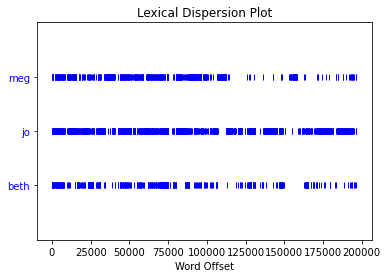

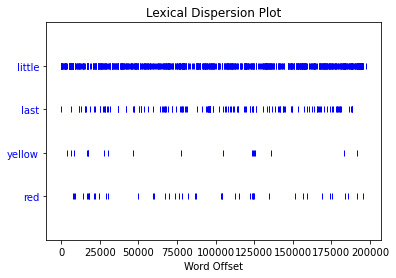

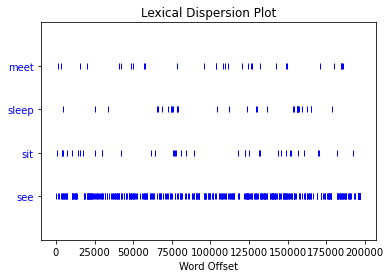

In [109]:
mytext.dispersion_plot(['meg', 'jo', 'beth'])
mytext.dispersion_plot(['little', 'last','yellow', 'red'])
mytext.dispersion_plot(['meet', 'sleep', 'sit', 'see'])